In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv('../data/churn_train.csv')

In [ ]:
churn['city'].unique()

In [ ]:
churn.columns

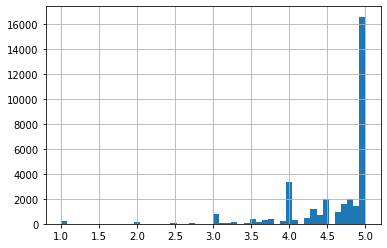

In [9]:
churn['avg_rating_of_driver'].hist(bins = 50)

In [ ]:
churn.head(20)
churn.count()

In [ ]:
to_replace = [{'luxury_car_user':{True:1,False:0},'phone':{'iPhone':1,'Android':0}}]
churn = churn.replace(to_replace)
churn['weekday_pct'] *= .01
na_replaces = {"avg_rating_by_driver" : 5, "avg_rating_of_driver" : 5, "phone" : 0}
churn = churn.fillna(na_replaces)

In [ ]:
churn[churn['iPhone'] == 'Android'].count()

In [ ]:
churn.count()

In [ ]:
churn

In [41]:
def pre_processing(churn):
    churn_ret = churn.copy()
    #bools to ints
    to_replace = {'luxury_car_user':{True:1,False:0},'phone':{'iPhone':1,'Android':0}}
    churn_ret = churn_ret.replace(to_replace)
    #Percentages were in 0-100, setting to 0-1
    churn_ret[['weekday_pct', 'surge_pct']] *= .01
    #Default NAs: ratings of 5, phone iphone
    na_replaces = {"avg_rating_by_driver" : 5, "avg_rating_of_driver" : 5, "phone" : 1}
    churn_ret = churn_ret.fillna(na_replaces)
    #Datetimes
    churn_ret['signup_date'] = pd.to_datetime(churn_ret['signup_date'])
    churn_ret['last_trip_date'] = pd.to_datetime(churn_ret['last_trip_date'])
    #Creating target
    churn_ret['churned'] = (churn_ret['last_trip_date'] < '2014-06-01').astype(int)
    churn_ret = churn_ret.drop('last_trip_date', axis = 1)
    #One hotting the city names
    churn_ret = pd.get_dummies(churn_ret, 'city')
    return churn_ret
x = pre_processing(churn)

In [42]:
x.count()

avg_dist                  40000
avg_rating_by_driver      40000
avg_rating_of_driver      40000
avg_surge                 40000
phone                     40000
signup_date               40000
surge_pct                 40000
trips_in_first_30_days    40000
luxury_car_user           40000
weekday_pct               40000
churned                   40000
city_Astapor              40000
city_King's Landing       40000
city_Winterfell           40000
dtype: int64

In [43]:
x.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churned,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.0,1.00,0.0,2014-05-03,0.0,0,0,1.0,1,1,0,0
1,8.06,5.0,5.0,1.00,0.0,2014-01-26,0.0,2,1,0.0,1,1,0,0
2,21.50,4.0,5.0,1.00,1.0,2014-05-21,0.0,1,1,1.0,1,0,0,1
3,9.46,5.0,5.0,2.75,0.0,2014-01-10,1.0,1,0,1.0,1,0,0,1
4,13.77,5.0,5.0,1.00,1.0,2014-05-13,0.0,0,0,1.0,1,0,0,1


In [29]:
x.info

<bound method DataFrame.info of    city
0     1>